In [6]:
!pip install seaborn
!pip install pandas
!pip install sklearn
!pip install matplotlib
!pip install numpy

# Carico i dati e osservo i primi dati

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head(15)


,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,Not Placed,M,55.6,Others,51.0,Others,Commerce,57.50,Comm&Mgmt,No,57.63,Mkt&HR,62.72,NaN
1,Not Placed,M,61.8,Others,47.0,Others,Commerce,54.38,Comm&Mgmt,No,57.00,Mkt&Fin,56.13,NaN
2,Not Placed,M,44.0,Central,58.0,Central,Arts,55.00,Comm&Mgmt,Yes,64.25,Mkt&HR,58.54,NaN
3,Placed,F,77.0,Others,73.0,Others,Commerce,81.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,69.70,200000.0
4,Placed,M,65.0,Central,65.0,Central,Commerce,75.00,Comm&Mgmt,No,83.00,Mkt&Fin,58.87,270000.0
5,Placed,F,85.0,Others,90.0,Others,Commerce,82.00,Comm&Mgmt,No,92.00,Mkt&Fin,68.03,300000.0
6,Placed,M,84.0,Others,79.0,Others,Science,68.00,Sci&Tech,Yes,84.00,Mkt&Fin,66.69,300000.0
7,Placed,F,73.0,Central,97.0,Others,Commerce,79.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,650000.0
8,Placed,M,62.0,Central,72.0,Central,Commerce,65.00,Comm&Mgmt,No,67.00,Mkt&Fin,56.49,216000.0
9,Placed,F,79.0,Central,76.0,Central,Science,65.60,Sci&Tech,No,58.00,Mkt&HR,55.47,320000.0


In [68]:
test_df.head()

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,Placed,M,71.0,Others,79.0,Others,Commerce,66.0,Comm&Mgmt,Yes,94.00,Mkt&Fin,57.55,240000.0
1,Placed,F,69.0,Central,78.0,Central,Commerce,72.0,Comm&Mgmt,No,71.00,Mkt&HR,62.74,300000.0
2,Placed,F,79.0,Others,61.0,Others,Science,75.5,Sci&Tech,Yes,70.00,Mkt&Fin,68.20,210000.0
3,Placed,M,82.0,Others,90.0,Others,Commerce,83.0,Comm&Mgmt,No,80.00,Mkt&HR,73.52,200000.0
4,Not Placed,F,46.0,Others,49.2,Others,Commerce,79.0,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,NaN


Sono presenti valori nulli solo nella colonna Salary

In [69]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   status          137 non-null    object 
 1   gender          137 non-null    object 
 2   ssc_p           137 non-null    float64
 3   ssc_b           137 non-null    object 
 4   hsc_p           137 non-null    float64
 5   hsc_b           137 non-null    object 
 6   hsc_s           137 non-null    object 
 7   degree_p        137 non-null    float64
 8   degree_t        137 non-null    object 
 9   workex          137 non-null    object 
 10  etest_p         137 non-null    float64
 11  specialisation  137 non-null    object 
 12  mba_p           137 non-null    float64
 13  salary          89 non-null     float64
dtypes: float64(6), object(8)
memory usage: 15.1+ KB


(array([50., 21., 11.,  2.,  3.,  0.,  1.,  0.,  0.,  1.]),
 array([200000., 274000., 348000., 422000., 496000., 570000., 644000.,
        718000., 792000., 866000., 940000.]),
 <a list of 10 Patch objects>)

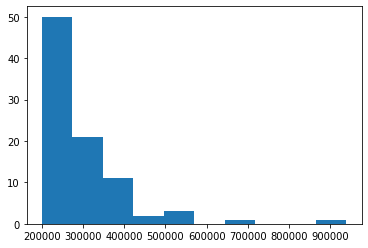

In [70]:
plt.hist(train_df.salary)

In [139]:
train_df.loc[train_df['status']=='Not Placed','salary'].unique()

array([nan])

In [74]:
train_df.loc[train_df['status']=='Placed','salary'].isna().sum()

0

La colonna status e la colonna salary sono rappresentative della stessa informazione quindi per tutte le persone non impiegate il valore salary risulta NaN. Con ciò procedo solo con l'obiettivo di generare un classificatore, ignorando la colonna salary che ipotizzo potrebbe essere utilizzata come target di una regressione.

In [75]:
train_df=train_df.drop('salary',axis=1)
test_df=test_df.drop('salary',axis=1)

# Variabili Categoriche

Cerco di capire se qualche variabile categorica non influenzano in modo significativo l'output


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


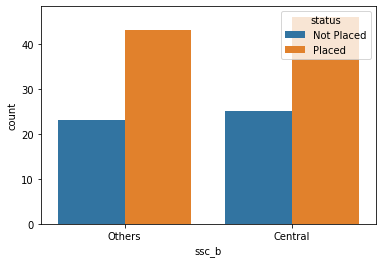

In [76]:
sns.countplot("ssc_b", hue="status", data=train_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


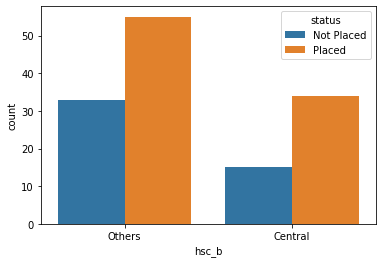

In [77]:
sns.countplot("hsc_b", hue="status", data=train_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


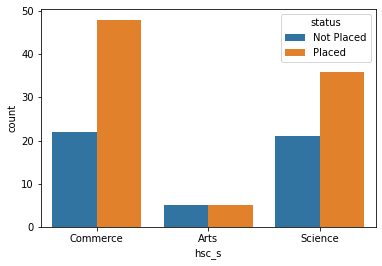

In [78]:
sns.countplot("hsc_s", hue="status", data=train_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


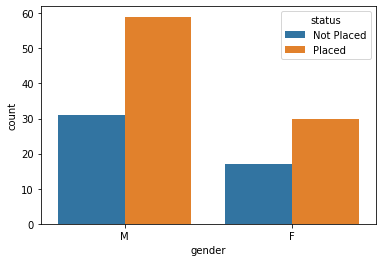

In [79]:
sns.countplot("gender", hue="status", data=train_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


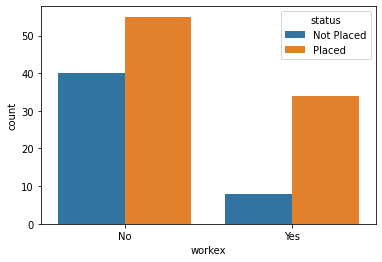

In [80]:
sns.countplot("workex", hue="status", data=train_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


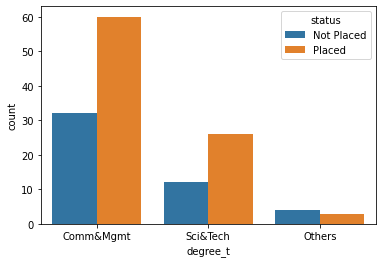

In [81]:
sns.countplot("degree_t", hue="status", data=train_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


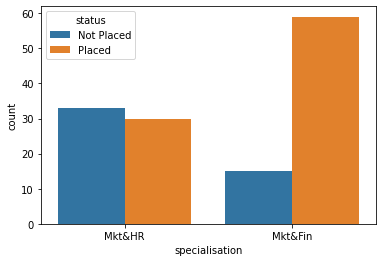

In [82]:
sns.countplot("specialisation", hue="status", data=train_df)

Osservano i grafici le uniche variabili che sembrerebbero non influenzare con l'output sono quelle relativa alla commissione d'esame. Quindi procendo con il drop delle due colonne.

In [83]:
train_df=train_df.drop(['hsc_b','ssc_b'],axis=1)
test_df=test_df.drop(['hsc_b','ssc_b'],axis=1)

In [85]:
train_df.head()

,status,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,Not Placed,M,55.6,51.0,Commerce,57.50,Comm&Mgmt,No,57.63,Mkt&HR,62.72
1,Not Placed,M,61.8,47.0,Commerce,54.38,Comm&Mgmt,No,57.00,Mkt&Fin,56.13
2,Not Placed,M,44.0,58.0,Arts,55.00,Comm&Mgmt,Yes,64.25,Mkt&HR,58.54
3,Placed,F,77.0,73.0,Commerce,81.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,69.70
4,Placed,M,65.0,65.0,Commerce,75.00,Comm&Mgmt,No,83.00,Mkt&Fin,58.87


In [86]:
test_df.head()

,status,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,Placed,M,71.0,79.0,Commerce,66.0,Comm&Mgmt,Yes,94.00,Mkt&Fin,57.55
1,Placed,F,69.0,78.0,Commerce,72.0,Comm&Mgmt,No,71.00,Mkt&HR,62.74
2,Placed,F,79.0,61.0,Science,75.5,Sci&Tech,Yes,70.00,Mkt&Fin,68.20
3,Placed,M,82.0,90.0,Commerce,83.0,Comm&Mgmt,No,80.00,Mkt&HR,73.52
4,Not Placed,F,46.0,49.2,Commerce,79.0,Comm&Mgmt,No,74.28,Mkt&Fin,53.29


# Variabili Numeriche
Procedo quindi controllando le variabili numeriche

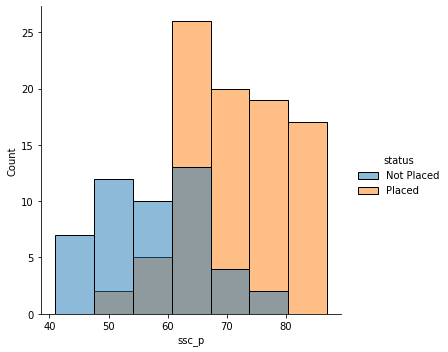

In [87]:
sns.displot(train_df,x='ssc_p',hue='status',bins=7)

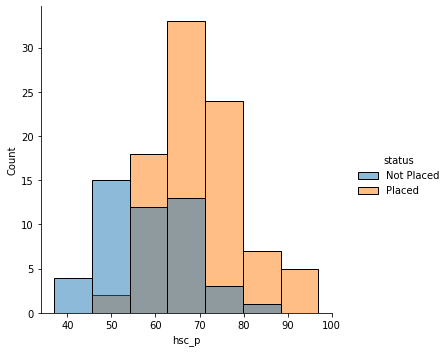

In [88]:
sns.displot(train_df,x='hsc_p',hue='status',bins=7)

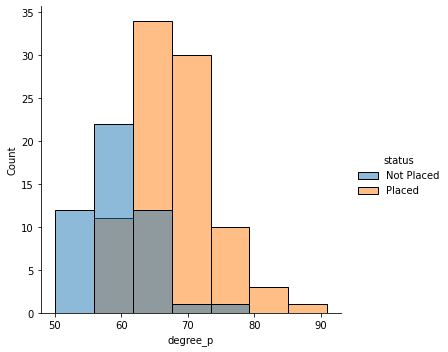

In [89]:
sns.displot(train_df,x='degree_p',hue='status',bins=7)

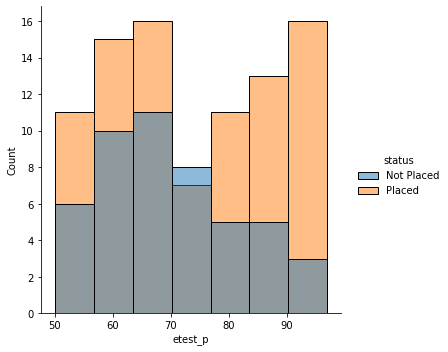

In [90]:
sns.displot(train_df,x='etest_p',hue='status',bins=7)

Osservando le distribuzioni di tutte le variabili numeriche in relazione alla variabile status l'unica che non ha una grande influenza sull'output è etest_p. Comunque potrebbe fornire qualche informazione, quindi non la elimino.Dalle altre variabili si evince che la maggior parte delle persone con dei voti alti tendono ad essere impiegate

# Preprocessing

In [91]:
train_df.nunique()

status              2
gender              2
ssc_p              79
hsc_p              74
hsc_s               3
degree_p           71
degree_t            3
workex              2
etest_p            74
specialisation      2
mba_p             136
dtype: int64

In [92]:
train_df["status"] = train_df.status.map({"Not Placed":0, "Placed":1})
train_df["workex"] = train_df.workex.map({"No":0, "Yes":1})
train_df["gender"] = train_df.gender.map({"M":0,"F":1})
train_df["specialisation"] = train_df.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})
test_df["status"] = test_df.status.map({"Not Placed":0, "Placed":1})
test_df["workex"] = test_df.workex.map({"No":0, "Yes":1})
test_df["gender"] = test_df.gender.map({"M":0,"F":1})
test_df["specialisation"] = test_df.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

In [94]:
train_df.head()

,status,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,0,0,55.6,51.0,Commerce,57.50,Comm&Mgmt,0,57.63,0,62.72
1,0,0,61.8,47.0,Commerce,54.38,Comm&Mgmt,0,57.00,1,56.13
2,0,0,44.0,58.0,Arts,55.00,Comm&Mgmt,1,64.25,0,58.54
3,1,1,77.0,73.0,Commerce,81.00,Comm&Mgmt,1,89.00,1,69.70
4,1,0,65.0,65.0,Commerce,75.00,Comm&Mgmt,0,83.00,1,58.87


In [95]:
test_df.head()

,status,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,0,71.0,79.0,Commerce,66.0,Comm&Mgmt,1,94.00,1,57.55
1,1,1,69.0,78.0,Commerce,72.0,Comm&Mgmt,0,71.00,0,62.74
2,1,1,79.0,61.0,Science,75.5,Sci&Tech,1,70.00,1,68.20
3,1,0,82.0,90.0,Commerce,83.0,Comm&Mgmt,0,80.00,0,73.52
4,0,1,46.0,49.2,Commerce,79.0,Comm&Mgmt,0,74.28,1,53.29


In [96]:
train_df_oh=train_df.copy()
test_df_oh=test_df.copy()

Per le variabili hsc_s e degree_t utilizzo un one hot encoding perchè le variabili non sono ordinali e i valori sono più di 2.

In [97]:
for col in ['hsc_s','degree_t']:
  dummy=pd.get_dummies(train_df_oh[col])
  train_df_oh=train_df_oh.join(dummy)
  train_df_oh=train_df_oh.drop(col,axis=1)
for col in ['hsc_s','degree_t']:
  dummy=pd.get_dummies(test_df_oh[col])
  test_df_oh=test_df_oh.join(dummy)
  test_df_oh=test_df_oh.drop(col,axis=1)

In [98]:
train_df_oh.head()

,status,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
0,0,0,55.6,51.0,57.50,0,57.63,0,62.72,0,1,0,1,0,0
1,0,0,61.8,47.0,54.38,0,57.00,1,56.13,0,1,0,1,0,0
2,0,0,44.0,58.0,55.00,1,64.25,0,58.54,1,0,0,1,0,0
3,1,1,77.0,73.0,81.00,1,89.00,1,69.70,0,1,0,1,0,0
4,1,0,65.0,65.0,75.00,0,83.00,1,58.87,0,1,0,1,0,0


In [99]:
test_df_oh.head()

,status,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
0,1,0,71.0,79.0,66.0,1,94.00,1,57.55,0,1,0,1,0,0
1,1,1,69.0,78.0,72.0,0,71.00,0,62.74,0,1,0,1,0,0
2,1,1,79.0,61.0,75.5,1,70.00,1,68.20,0,0,1,0,0,1
3,1,0,82.0,90.0,83.0,0,80.00,0,73.52,0,1,0,1,0,0
4,0,1,46.0,49.2,79.0,0,74.28,1,53.29,0,1,0,1,0,0


In [100]:
y_train=train_df_oh['status']
X_train=train_df_oh.drop('status',axis=1)
y_test=test_df_oh['status']
X_test=test_df_oh.drop('status',axis=1)

In [131]:
lr=LogisticRegression().fit(X_train,y_train)
pred=lr.predict(X_test)

from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, pred)
precision = metrics.precision_score(y_test, pred)
recall = metrics.recall_score(y_test, pred)

print(f"precision: {precision:.4} -- recall: {recall:.4} -- ACCURACY: {accuracy:.4} ")

precision: 0.9259 -- recall: 0.8929 -- ACCURACY: 0.8571 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Provo a scalare i dati per correggere l'errore

In [134]:
 from sklearn.preprocessing import MinMaxScaler
 scaler = MinMaxScaler()
 scaled_train_df=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
 scaled_test_df=pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)

In [135]:
scaled_train_df.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
0,0.0,0.319020,0.233333,0.182927,0.0,0.162340,0.0,0.468059,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.453481,0.166667,0.106829,0.0,0.148936,1.0,0.198198,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.067447,0.350000,0.121951,1.0,0.303191,0.0,0.296888,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.783127,0.600000,0.756098,1.0,0.829787,1.0,0.753890,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.522880,0.466667,0.609756,0.0,0.702128,1.0,0.310401,0.0,1.0,0.0,1.0,0.0,0.0


# Modello
Vado a creare il modello e a verificarne l'accuratezza

In [136]:
lr=LogisticRegression().fit(scaled_train_df,y_train)
pred=lr.predict(scaled_test_df)

from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, pred)
precision = metrics.precision_score(y_test, pred)
recall = metrics.recall_score(y_test, pred)

print(f"precision: {precision:.4} -- recall: {recall:.4} -- ACCURACY: {accuracy:.4} ")

precision: 0.9259 -- recall: 0.8929 -- ACCURACY: 0.8571 


In [137]:
print(pd.crosstab(y_test, pred, rownames=['valore reale'], colnames=['valore previsto']))

valore previsto  0   1
valore reale          
0                5   2
1                3  25
